In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from p2ch12.dsets import getCandidateInfoList, getCt, LunaDataset
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

In [3]:
from p2ch12.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2025-07-14 09:02:52,955 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x00000291012A8430>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

In [5]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)

2025-07-14 09:02:54,506 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x0000029112607580>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2025-07-14 09:02:54,541 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x0000029174C63A60>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2025-07-14 09:02:54,590 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x00000291126045B0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2025-07-14 09:02:54,640 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x0000029112604580>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2025-07-14 09:02:54,673 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x00000291126049D0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2025-07-14 09:02:54,724 INFO     pid:13640 p2ch12.

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))


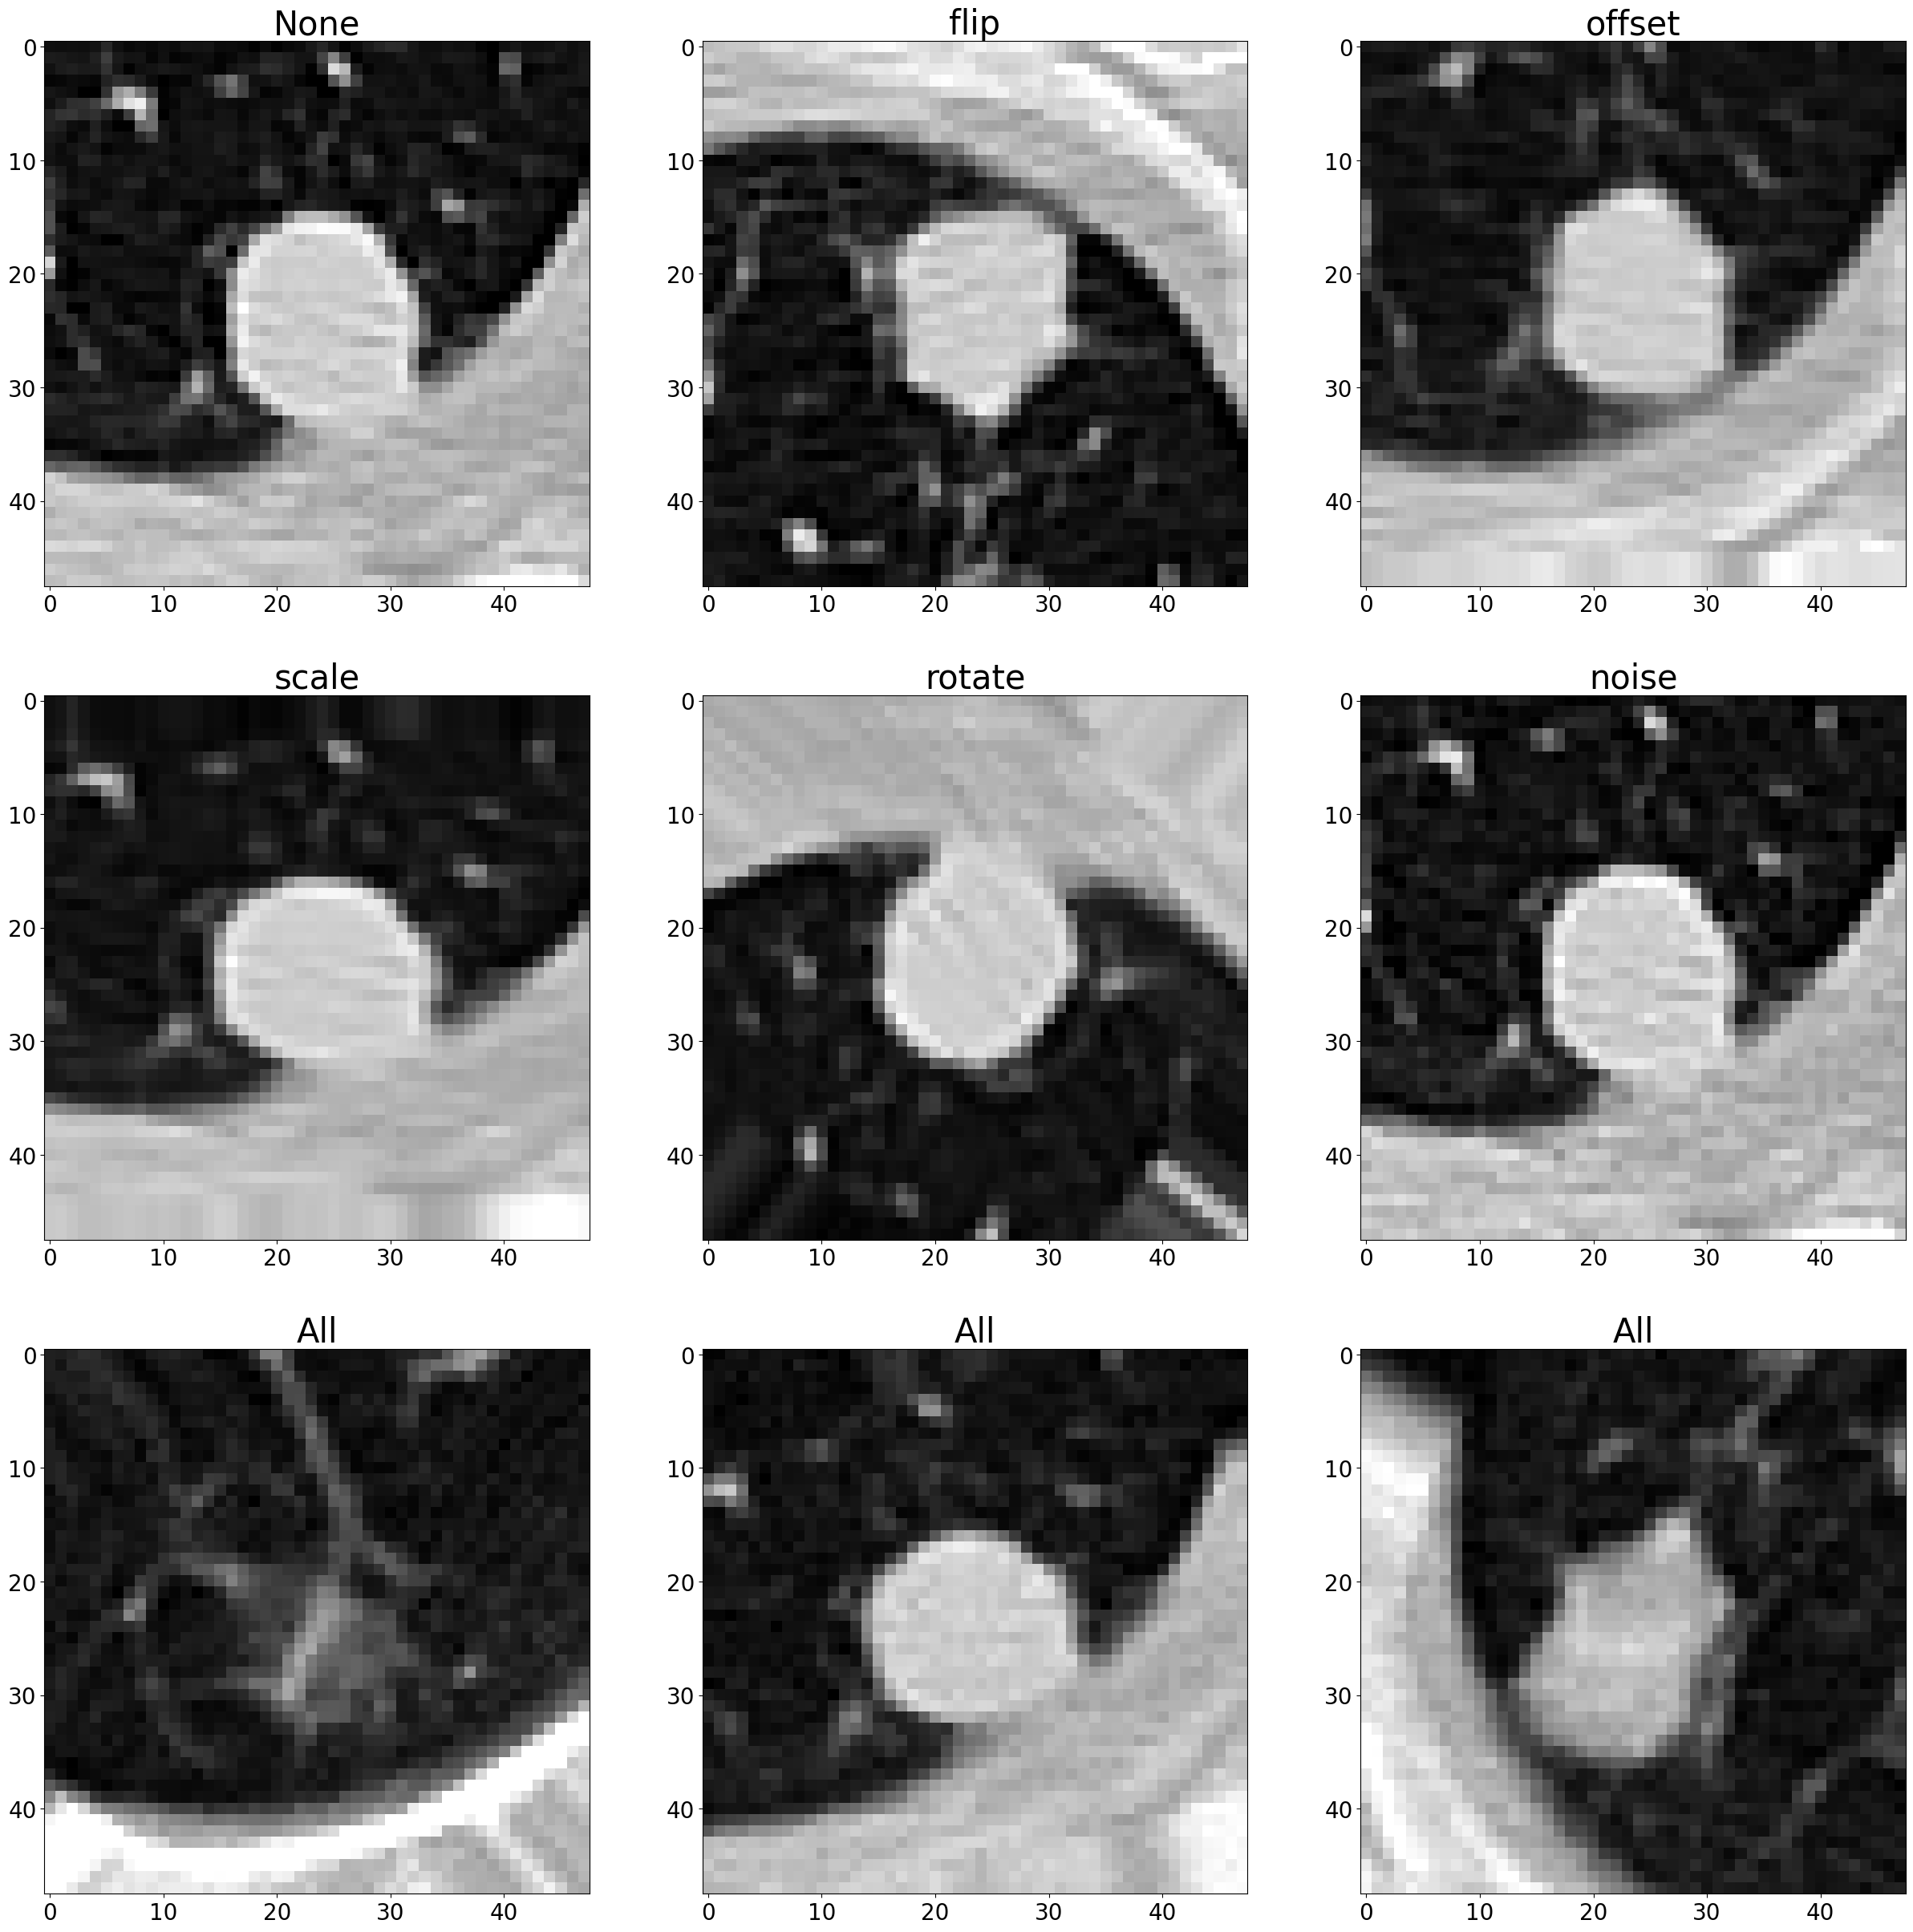

In [6]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155


sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')

2025-07-14 09:03:05,888 INFO     pid:13640 p2ch12.dsets:266:__init__ <p2ch12.dsets.LunaDataset object at 0x0000029103ECA110>: 911 training samples, 904 neg, 7 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800 203 False [203, 205, 385, 470, 495, 789, 813]


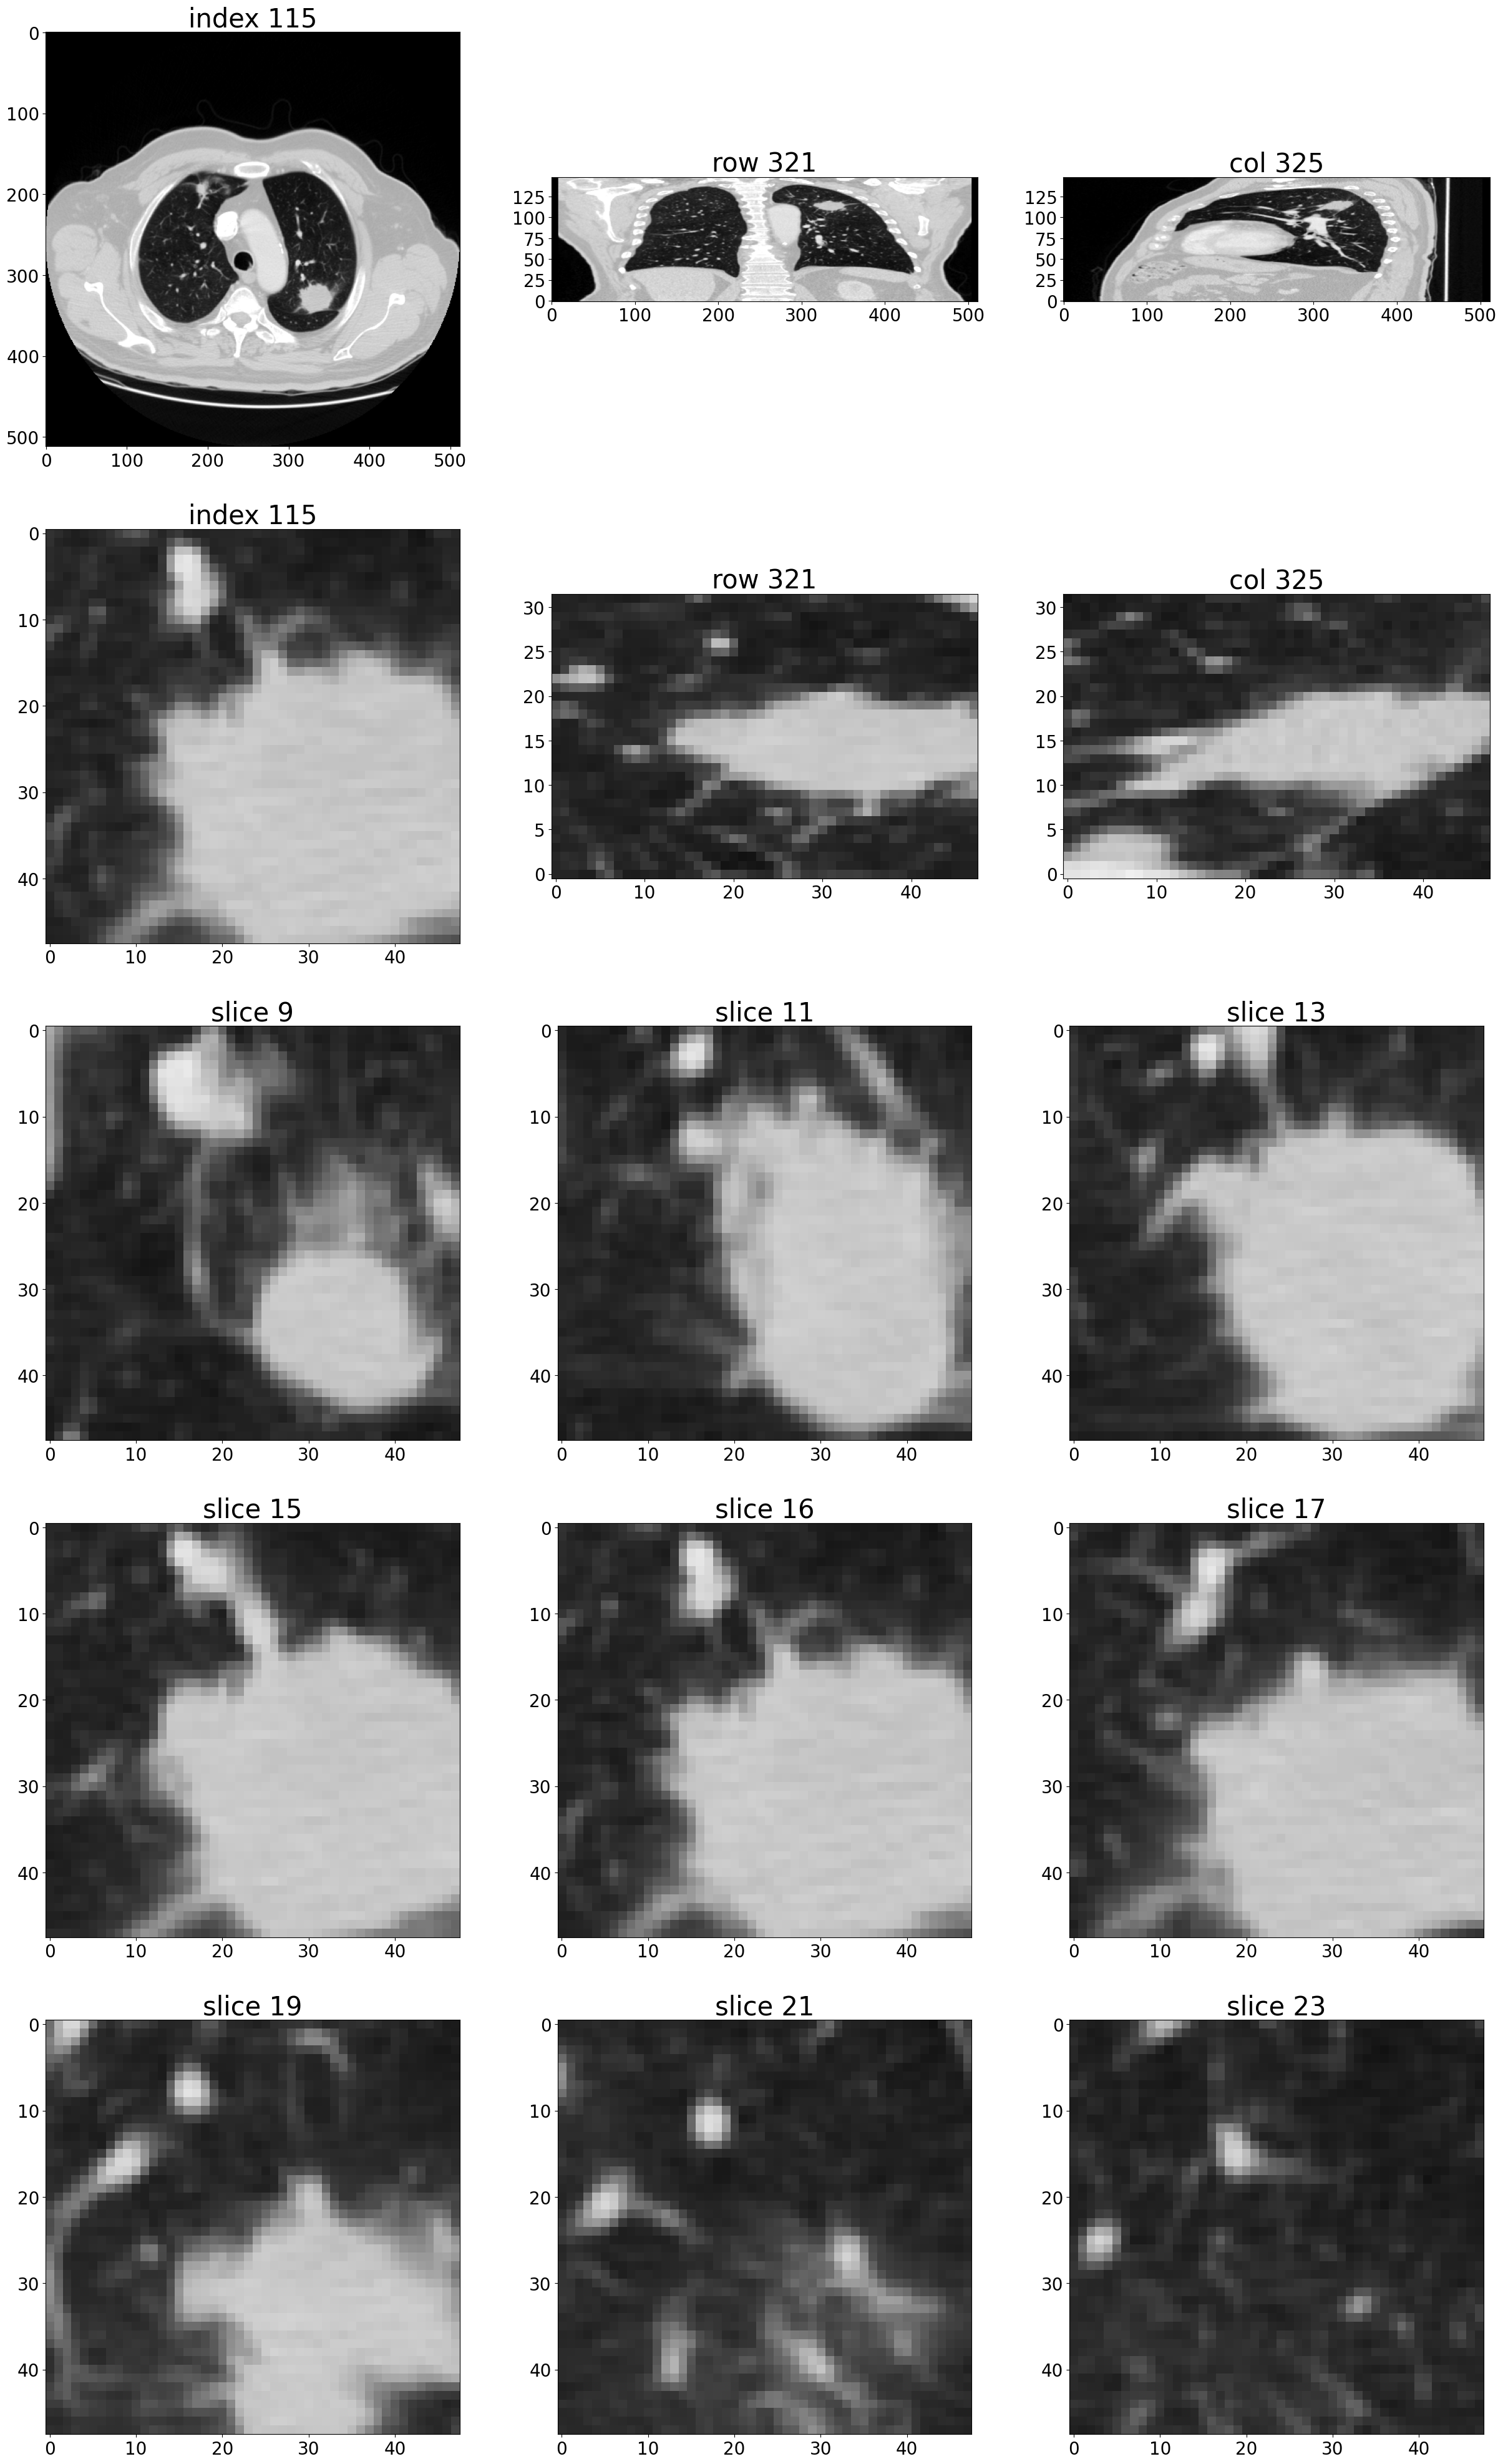

In [7]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid)

## 양성 환자 슬라이스

In [ ]:
for cand in candidateInfo_list:
    if cand.series_uid == '1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518' and cand.isNodule_bool:
        print(cand.center_xyz)

(49.53559443, 38.95369224, -240.6466135)
(-53.38512234, 96.26586805, -226.6505294)
(-42.32247734, -5.649197342, -159.7013144)
(-33.21434203, 103.1113503, -192.9300139)
(72.62, 83.6, -244.83)
(-10.82710026, 61.35131375, -166.2677909)
(108.38, -4.03, -123.52)
(-33.24, -16.65, -102.48)
(109.78, -33.48, -188.73)
(73.32, 104.63, -149.47)
(-36.74, 85.7, -150.87)
(-61.28, -40.49, -206.26)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17448\548208798.py:53: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(axial_crop, cmap='gray')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17448\548208798.py:57: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(coronal_crop, cmap='gray')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17448\548208798.py:61: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(sagittal_crop, cmap='gray')


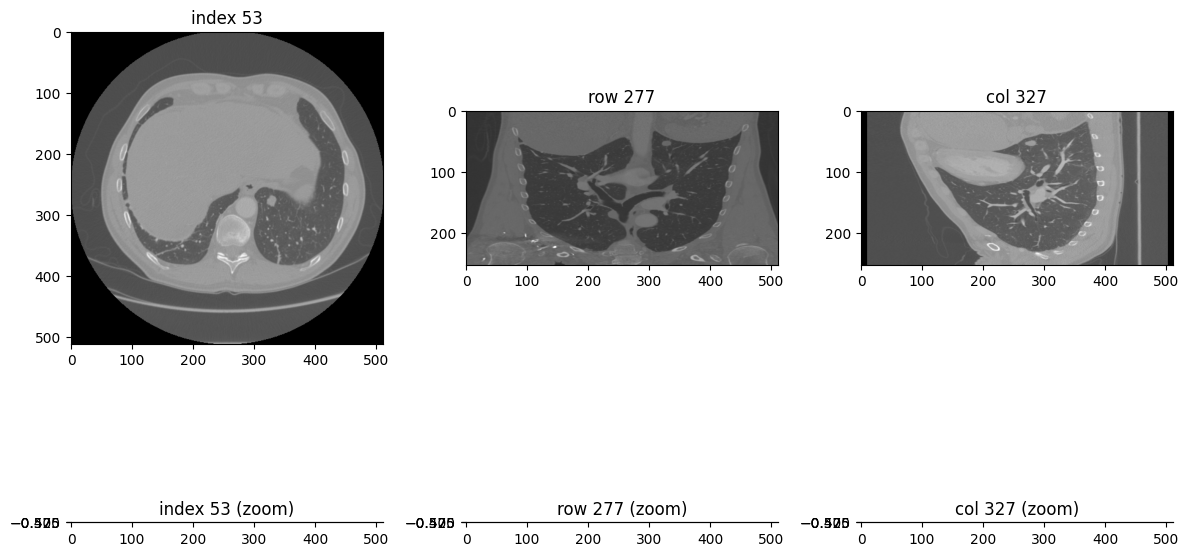

In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518'
center_xyz = (49.53559443, 38.95369224, -240.6466135)
ct = getCt(series_uid)
irc_coord = tuple(int(round(i)) for i in xyz2irc(center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a))

z, y, x = irc_coord
hu_a = ct.hu_a


crop_size = 48

def crop_center(img, center, size):
    start = max(center - size // 2, 0)
    end = start + size
    return img[start:end]

# 3D crop
axial_img = hu_a[z]
coronal_img = hu_a[:, y, :]
sagittal_img = hu_a[:, :, x]


axial_crop = crop_center(crop_center(axial_img, y, crop_size), x, crop_size)
coronal_crop = crop_center(crop_center(coronal_img, z, crop_size), x, crop_size)
sagittal_crop = crop_center(crop_center(sagittal_img, z, crop_size), y, crop_size)


fig = plt.figure(figsize=(12, 8))


plt.subplot(2, 3, 1)
plt.imshow(axial_img, cmap='gray')
plt.title(f'index {z}')

plt.subplot(2, 3, 2)
plt.imshow(coronal_img, cmap='gray')
plt.title(f'row {y}')

plt.subplot(2, 3, 3)
plt.imshow(sagittal_img, cmap='gray')
plt.title(f'col {x}')


plt.subplot(2, 3, 4)
plt.imshow(axial_crop, cmap='gray')
plt.title(f'index {z} (zoom)')

plt.subplot(2, 3, 5)
plt.imshow(coronal_crop, cmap='gray')
plt.title(f'row {y} (zoom)')

plt.subplot(2, 3, 6)
plt.imshow(sagittal_crop, cmap='gray')
plt.title(f'col {x} (zoom)')

plt.tight_layout()
plt.show()

2025-07-11 10:09:29,670 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B5313B7F0>: 993 training samples, 979 neg, 14 pos, unbalanced ratio


Sample 0 - UID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886, center: (67.61451718, 85.02525992, -109.8084416)
1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886 61 False [61, 369, 385, 390, 470, 477, 495, 515, 546, 606, 847, 897, 954, 973]


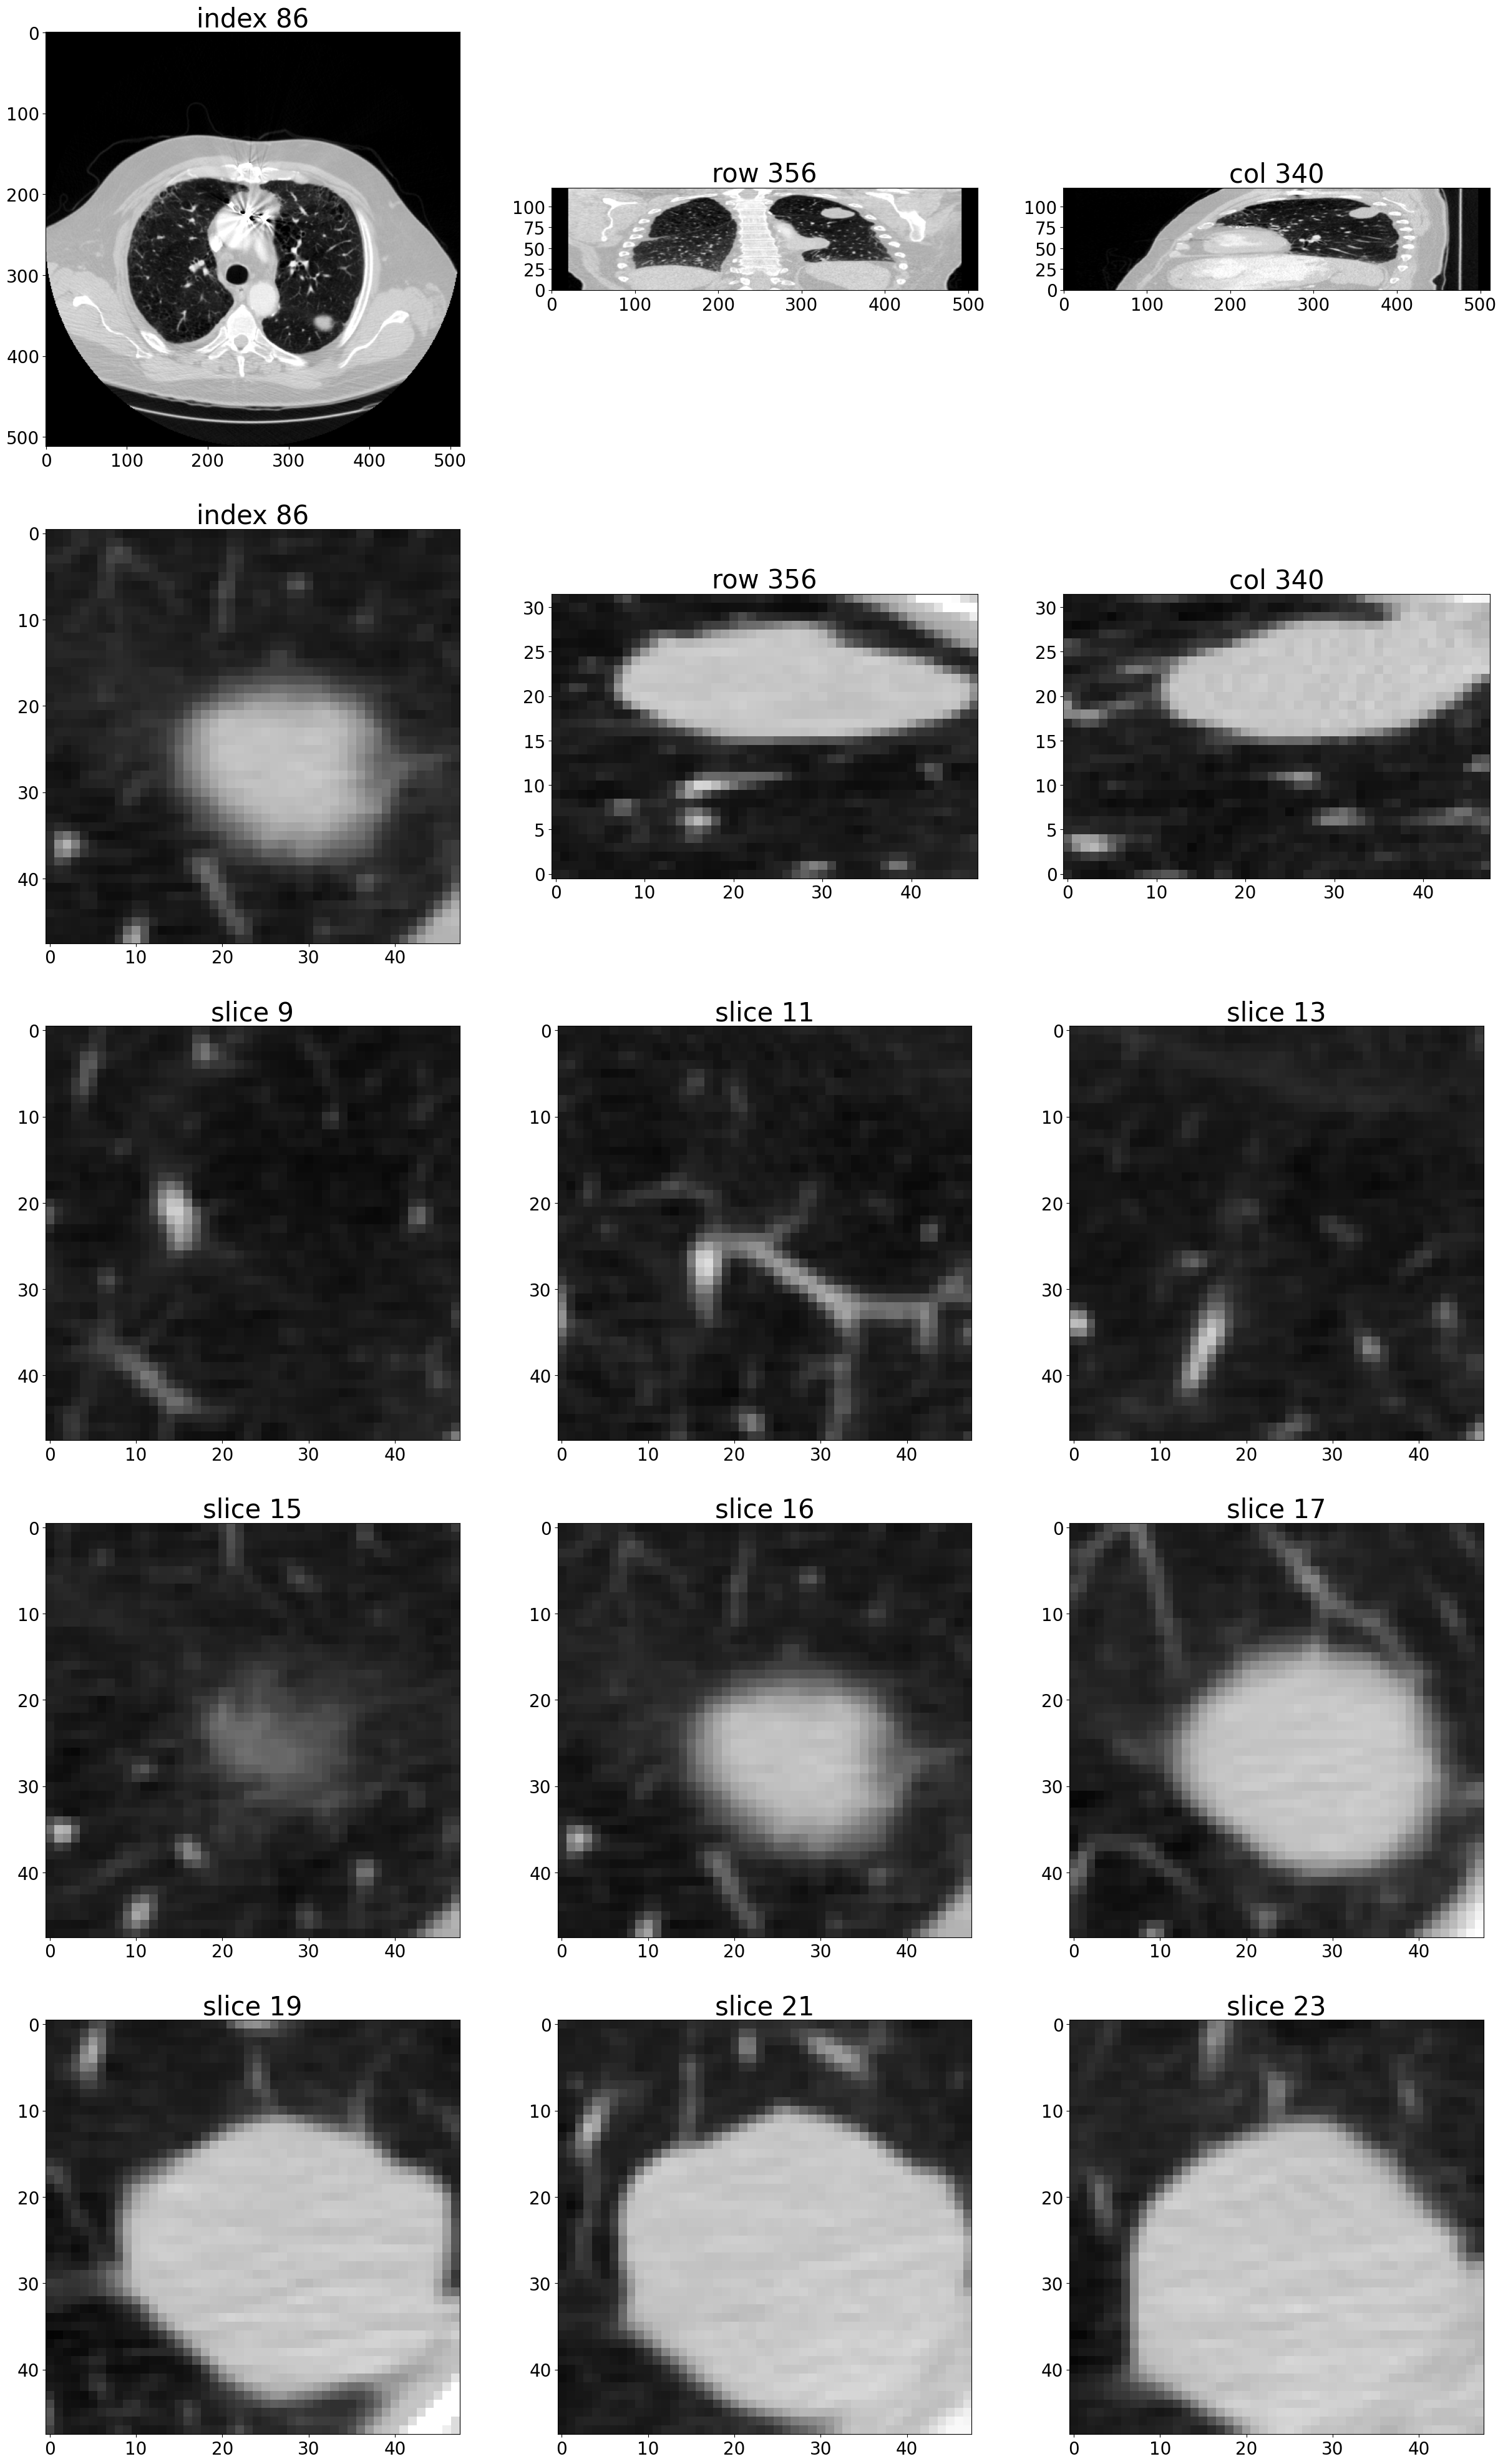

In [10]:
for i, tup in enumerate(positiveSample_list[:1]): 
    print(f"Sample {i} - UID: {tup.series_uid}, center: {tup.center_xyz}")
    showCandidate(tup.series_uid)

2025-07-11 10:21:17,718 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B62E0BA00>: 993 training samples, 979 neg, 14 pos, unbalanced ratio
2025-07-11 10:21:17,733 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B5729ABC0>: 993 training samples, 979 neg, 14 pos, unbalanced ratio
2025-07-11 10:21:17,750 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B531C8850>: 993 training samples, 979 neg, 14 pos, unbalanced ratio
2025-07-11 10:21:17,766 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B62E08F70>: 993 training samples, 979 neg, 14 pos, unbalanced ratio
2025-07-11 10:21:17,780 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B62E09210>: 993 training samples, 979 neg, 14 pos, unbalanced ratio
2025-07-11 10:21:17,793 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDat

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', tensor([ 91, 360, 341]))


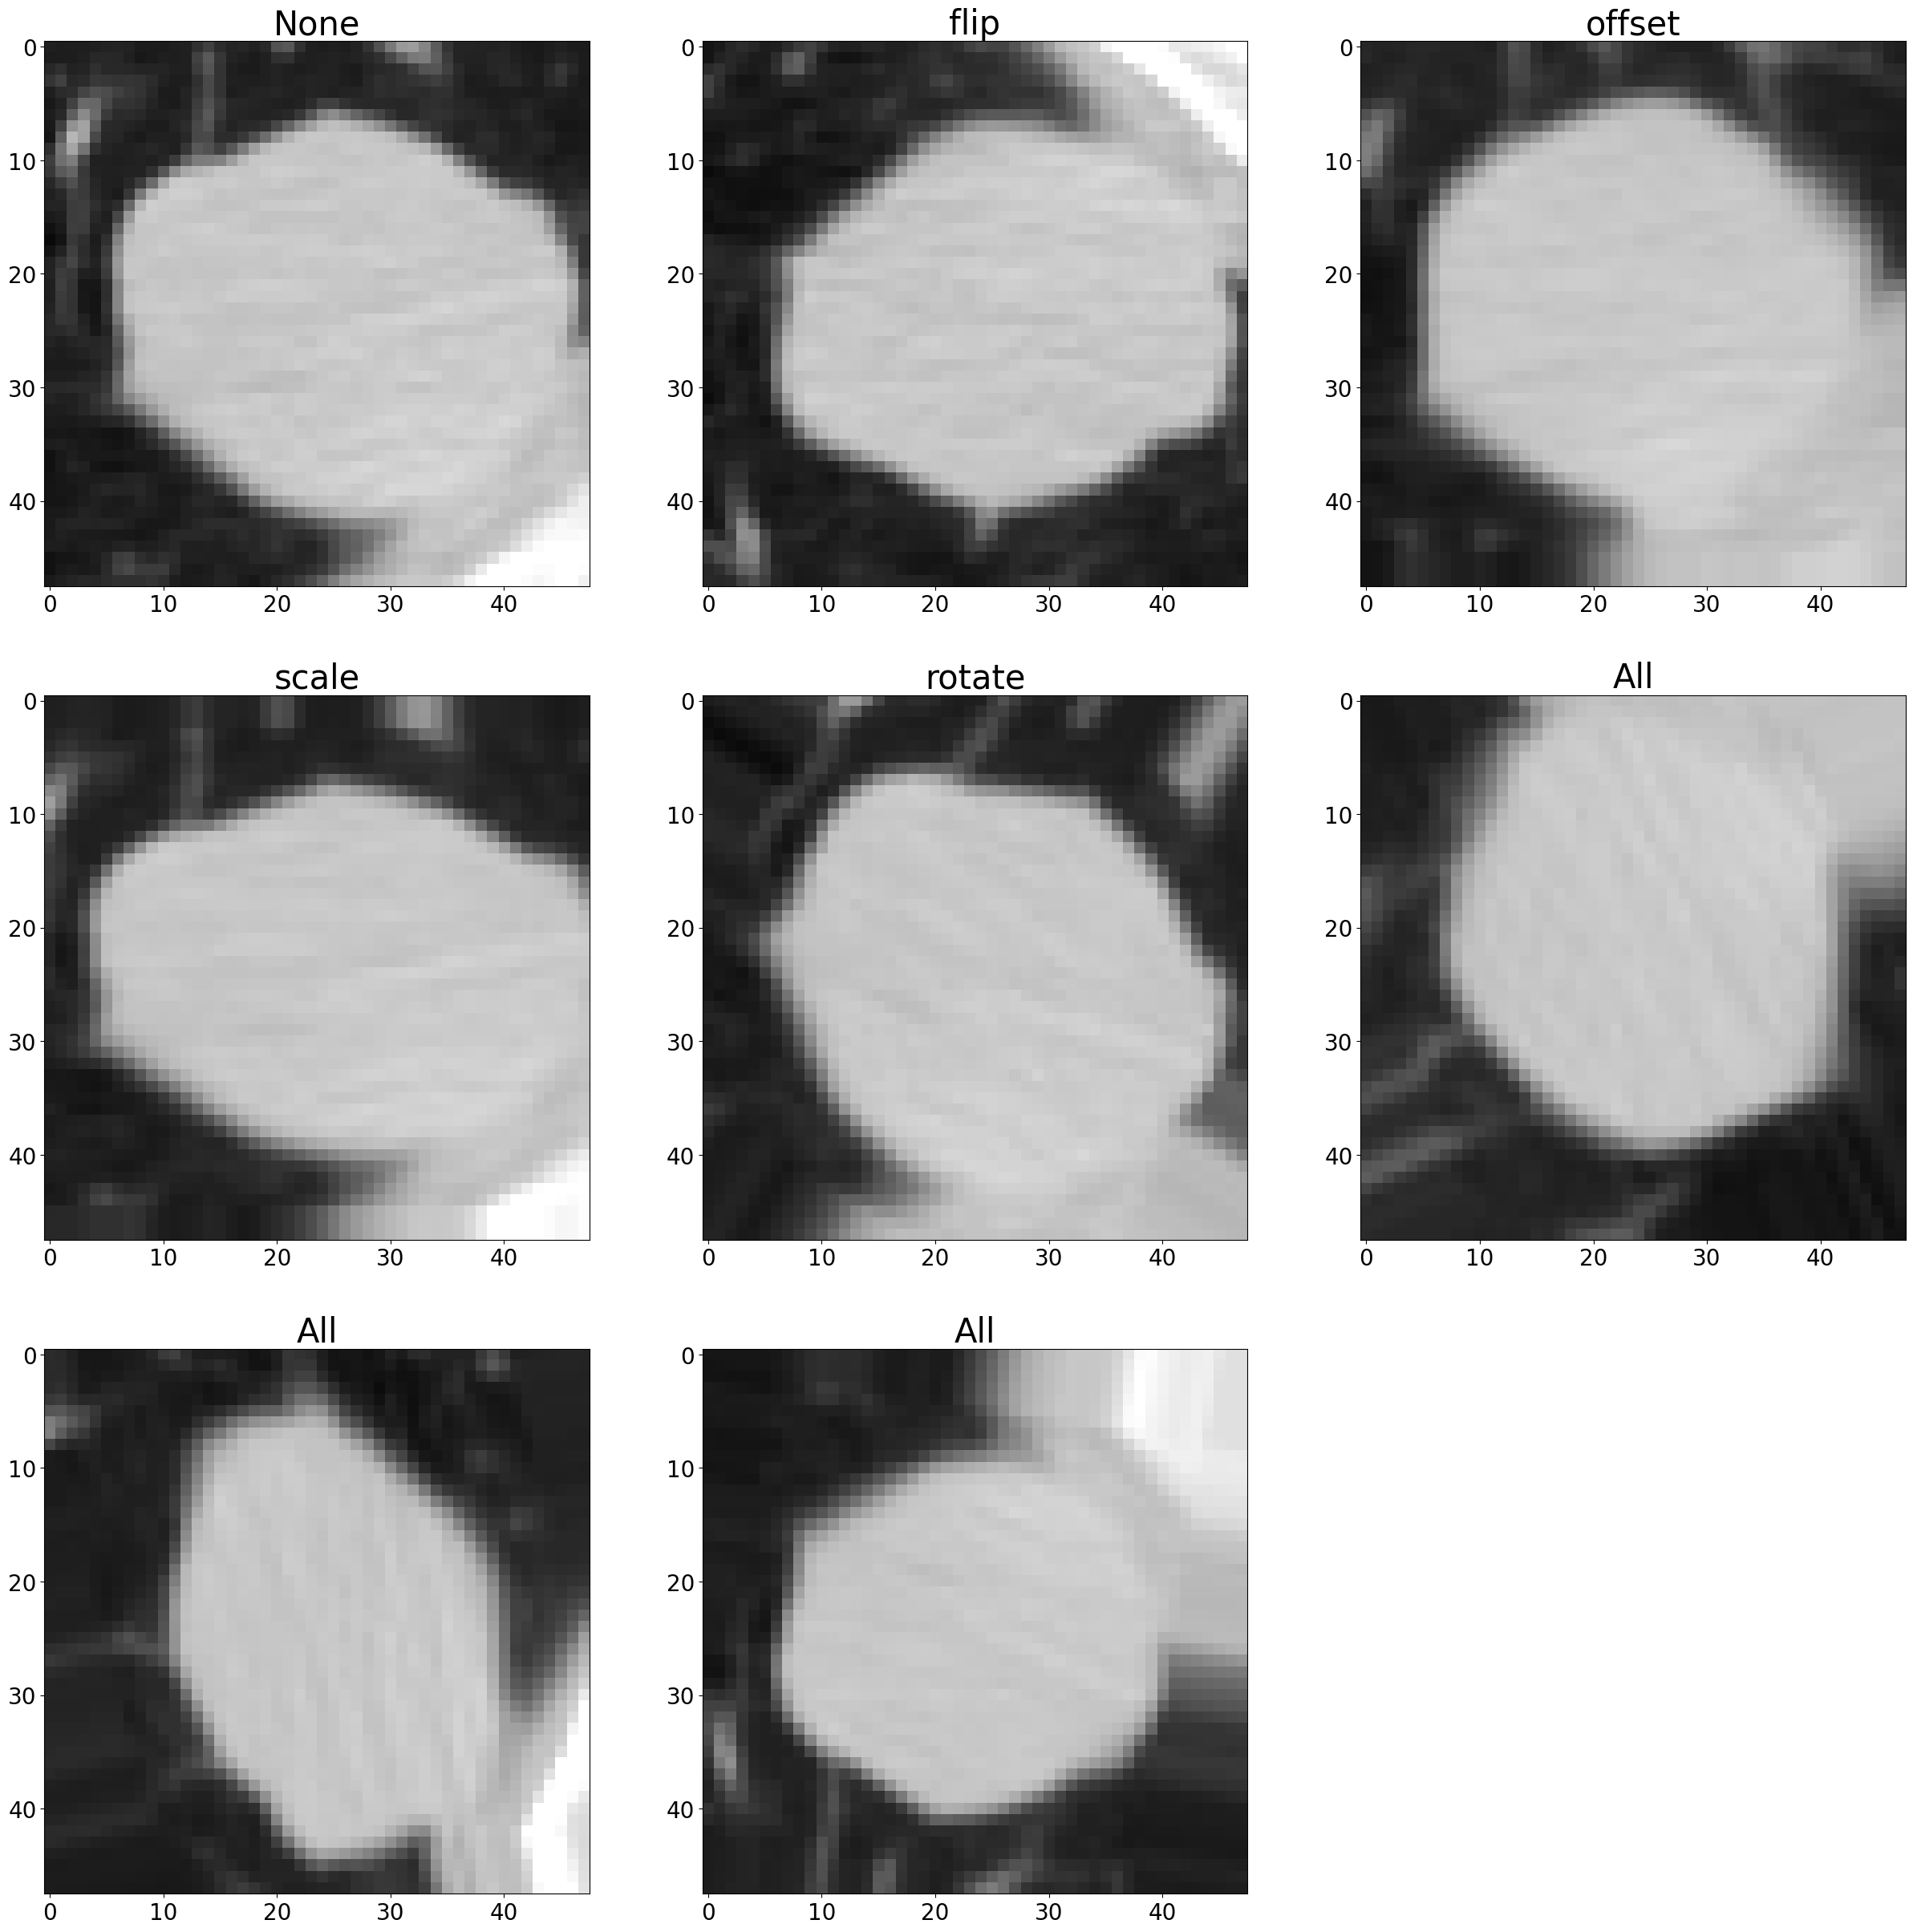

In [ ]:
my_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'


augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
]

ds_list = [
    LunaDataset(series_uid=my_uid, sortby_str='label_and_size', augmentation_dict=aug_dict)
    for _, aug_dict in augmentation_list
]


all_aug_dict = {}
for _, aug_dict in augmentation_list:
    all_aug_dict.update(aug_dict)

all_ds = LunaDataset(series_uid=my_uid, sortby_str='label_and_size', augmentation_dict=all_aug_dict)
augmentation_list.extend([('All', all_aug_dict)] * 3)
ds_list.extend([all_ds] * 3)


sample_ndx = 0 

sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))
clim = (-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')

## 음성 환자

In [41]:
negativeSample_list = [
    tup for tup in getCandidateInfoList() if not tup.isNodule_bool
]

for i, tup in enumerate(negativeSample_list[:1]): 
    print(f"Sample {i} - UID: {tup.series_uid}, center: {tup.center_xyz}")
    showCandidate(tup.series_uid)

2025-07-11 10:21:29,229 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B53B56080>: 0 training samples, 0 neg, 0 pos, unbalanced ratio


Sample 0 - UID: 1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335, center: (107.65, 7.8, -205.1)


AssertionError: 1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335.mhd not found in subset0~2

# 음성환자 클리핑 전후

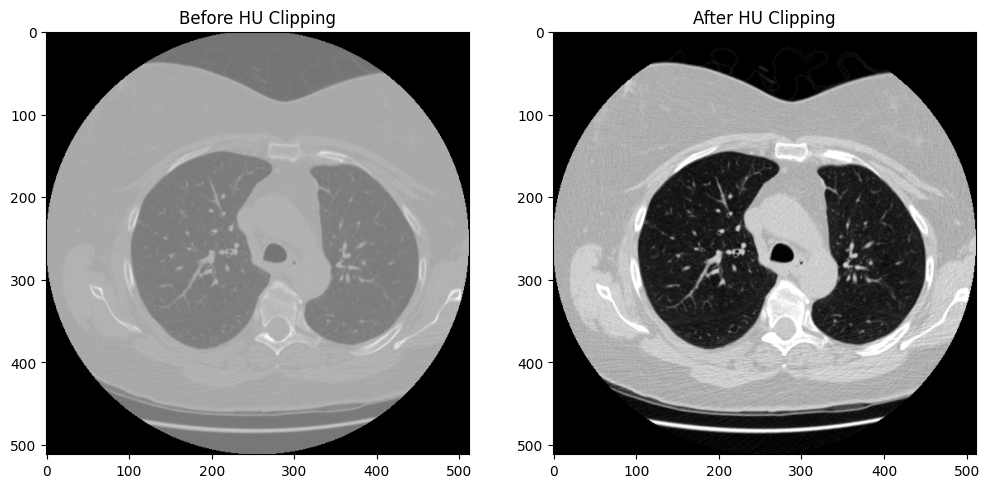

In [42]:
import SimpleITK as sitk

uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058'

import glob
mhd_path = glob.glob(f'data-unversioned/part2/luna/subset*/{uid}.mhd')[0]

ct_mhd = sitk.ReadImage(mhd_path)
ct_raw = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

ct_clip = ct_raw.copy()
ct_clip.clip(-1000, 1000, out=ct_clip)

z = 93
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ct_raw[z], cmap='gray')
plt.title("Before HU Clipping")
plt.subplot(1, 2, 2)
plt.imshow(ct_clip[z], cmap='gray', vmin=-1000, vmax=300)
plt.title("After HU Clipping")
plt.show()

# 양성 환자 클리핑 전후

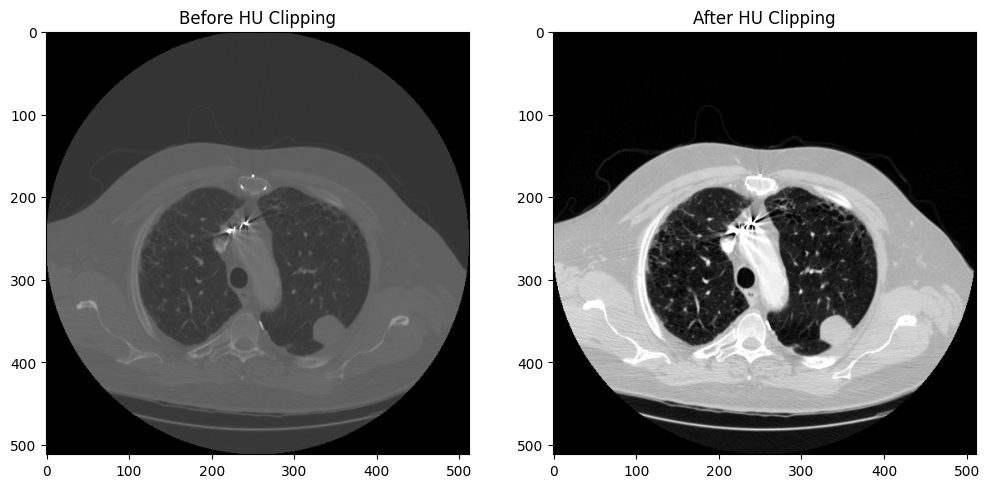

In [43]:
import SimpleITK as sitk

uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'

import glob
mhd_path = glob.glob(f'data-unversioned/part2/luna/subset*/{uid}.mhd')[0]

ct_mhd = sitk.ReadImage(mhd_path)
ct_raw = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

ct_clip = ct_raw.copy()
ct_clip.clip(-1000, 1000, out=ct_clip)

z = 93
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ct_raw[z], cmap='gray')
plt.title("Before HU Clipping")
plt.subplot(1, 2, 2)
plt.imshow(ct_clip[z], cmap='gray', vmin=-1000, vmax=300)
plt.title("After HU Clipping")
plt.show()

# 음성 환자 종양 증강

2025-07-11 10:21:40,053 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B4930FE20>: 833 training samples, 832 neg, 1 pos, unbalanced ratio
2025-07-11 10:21:40,070 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B4930DDE0>: 833 training samples, 832 neg, 1 pos, unbalanced ratio
2025-07-11 10:21:40,083 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B53BC04C0>: 833 training samples, 832 neg, 1 pos, unbalanced ratio
2025-07-11 10:21:40,096 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B57288BB0>: 833 training samples, 832 neg, 1 pos, unbalanced ratio
2025-07-11 10:21:40,109 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset object at 0x0000024B4930F670>: 833 training samples, 832 neg, 1 pos, unbalanced ratio
2025-07-11 10:21:40,126 INFO     pid:17448 p2ch12.dsets:271:__init__ <p2ch12.dsets.LunaDataset 

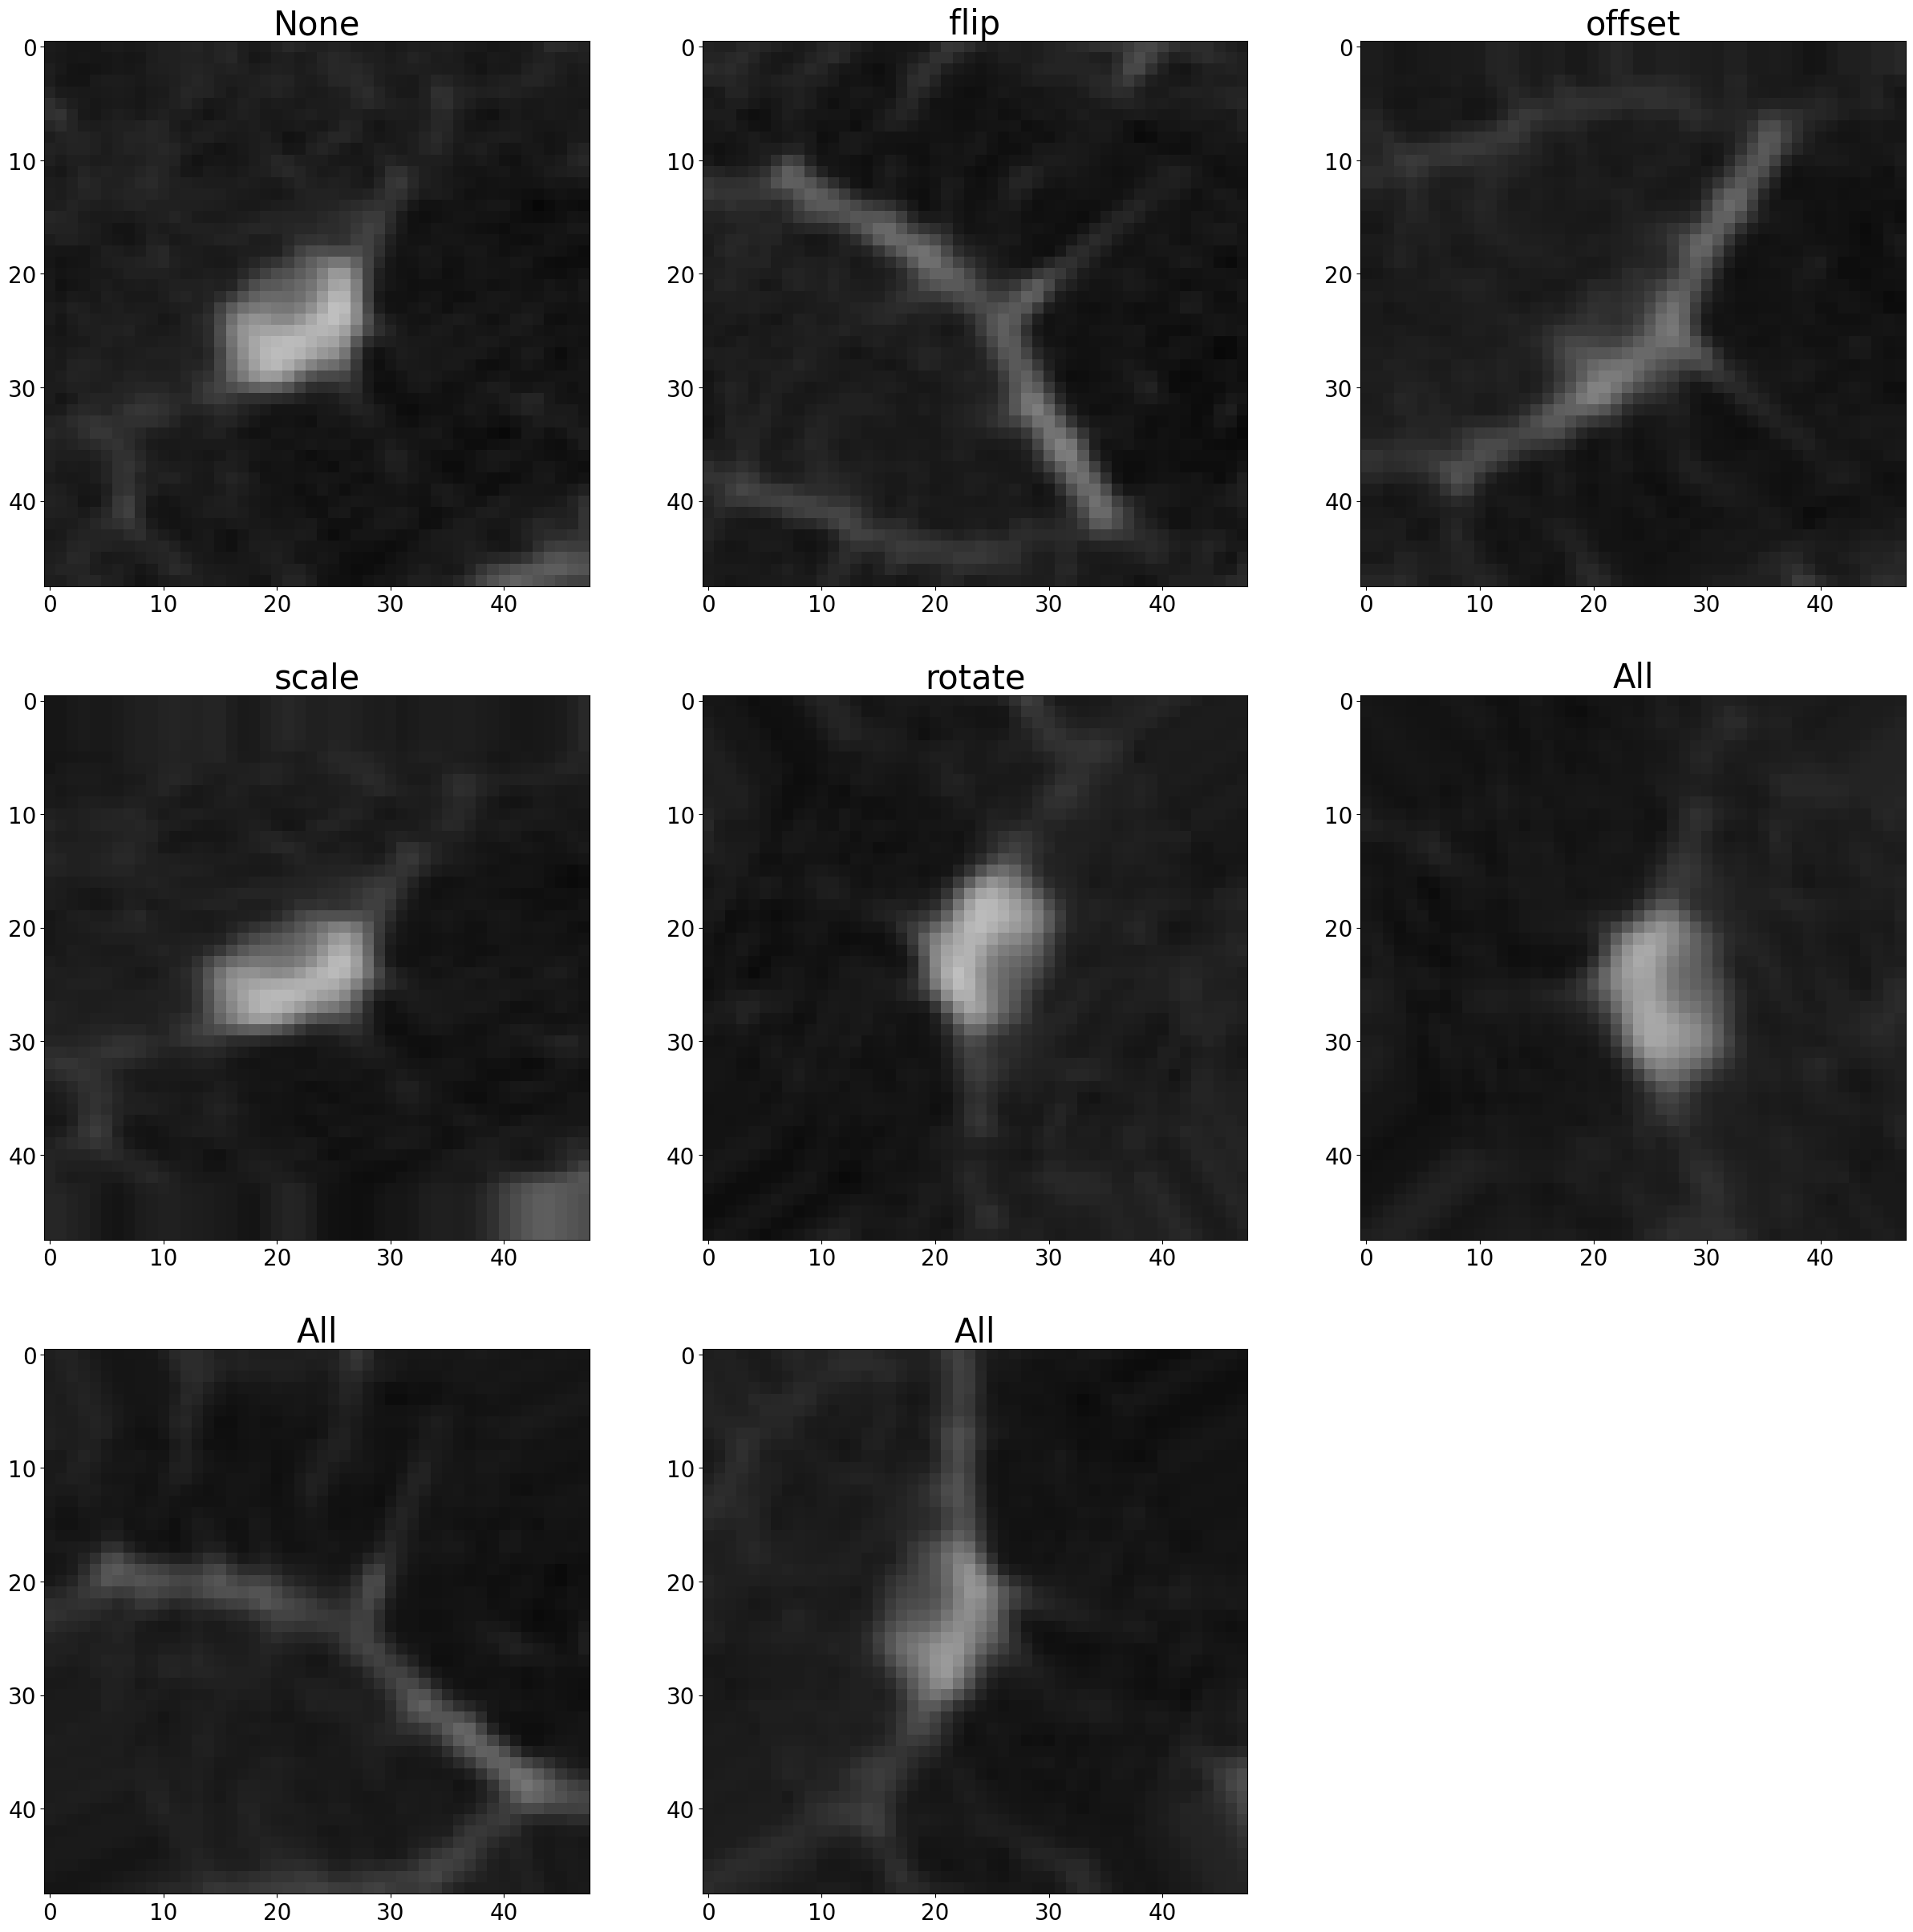

In [ ]:
my_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058'


augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
]

ds_list = [
    LunaDataset(series_uid=my_uid, sortby_str='label_and_size', augmentation_dict=aug_dict)
    for _, aug_dict in augmentation_list
]


all_aug_dict = {}
for _, aug_dict in augmentation_list:
    all_aug_dict.update(aug_dict)

augmentation_list.extend([('All', all_aug_dict)] * 3)
ds_list.extend([LunaDataset(series_uid=my_uid, sortby_str='label_and_size', augmentation_dict=all_aug_dict)] * 3)


sample_ndx = 0


fig = plt.figure(figsize=(30, 30))
clim = (-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], cmap='gray', clim=clim)
plt.show()

In [ ]:
def show_ct_slices(series_uid, patient_type="Unknown", slice_indices=[80, 100], clip_hu=(-1000, 300)):
    mhd_path = glob.glob(f'data-unversioned/part2/luna/subset*/{series_uid}.mhd')[0]
    ct_mhd = sitk.ReadImage(mhd_path)
    ct_array = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    ct_clip = ct_array.copy()
    ct_clip.clip(clip_hu[0], clip_hu[1], out=ct_clip)

    fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 7))
    for i, z in enumerate(slice_indices):
        axes[i].imshow(ct_clip[z], cmap='gray', vmin=clip_hu[0], vmax=clip_hu[1])
        axes[i].set_title(f"Slice z={z}", fontsize=14)
        axes[i].axis('off')
    plt.suptitle(f"{patient_type} Patient\nCT slices (UID: {series_uid})", fontsize=16)
    plt.show()

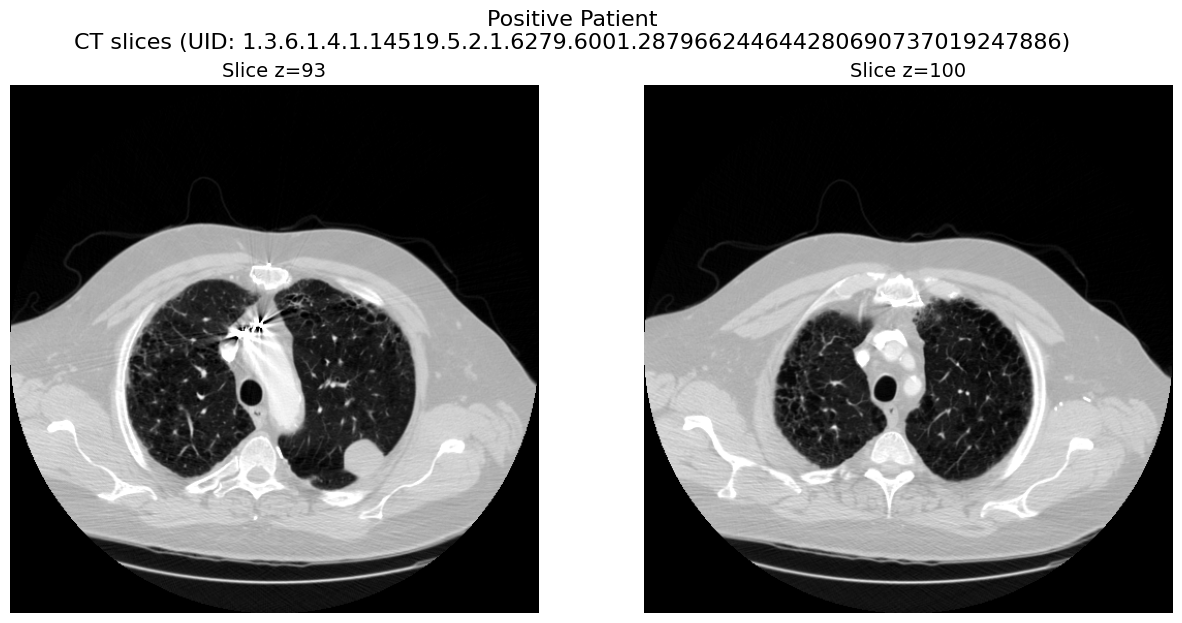

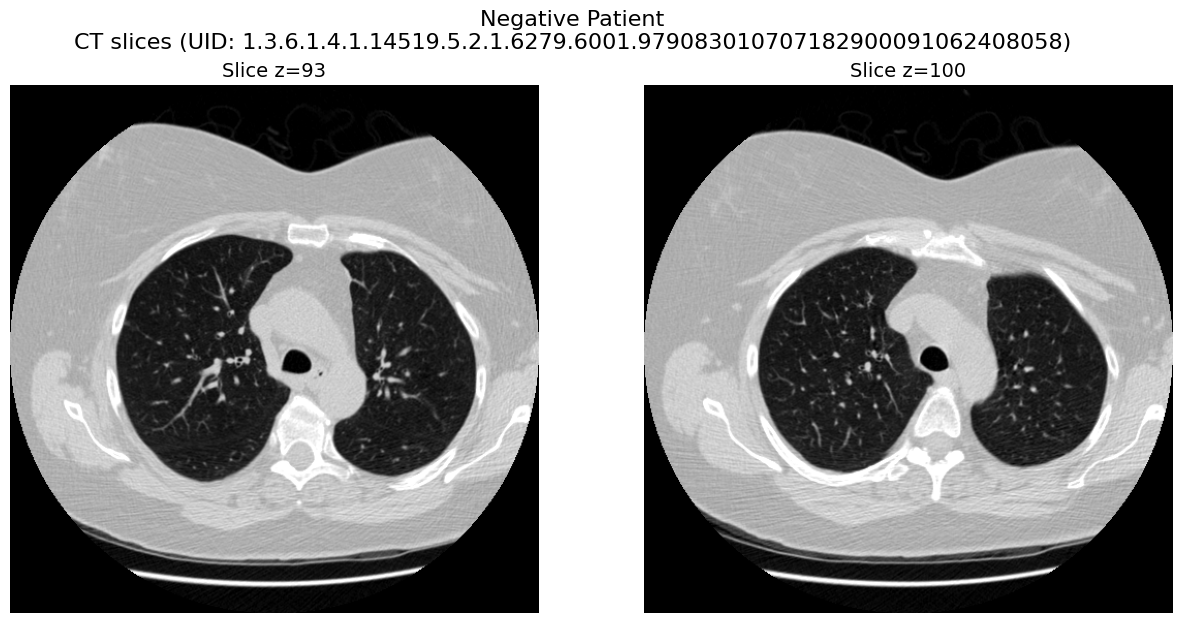

In [ ]:
positive_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'
show_ct_slices(series_uid=positive_uid, patient_type="Positive", slice_indices=[93, 100])

negative_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058'
show_ct_slices(series_uid=negative_uid, patient_type="Negative", slice_indices=[93, 100])

## 양성환자의 실제 annotation.csv로 실제 종양

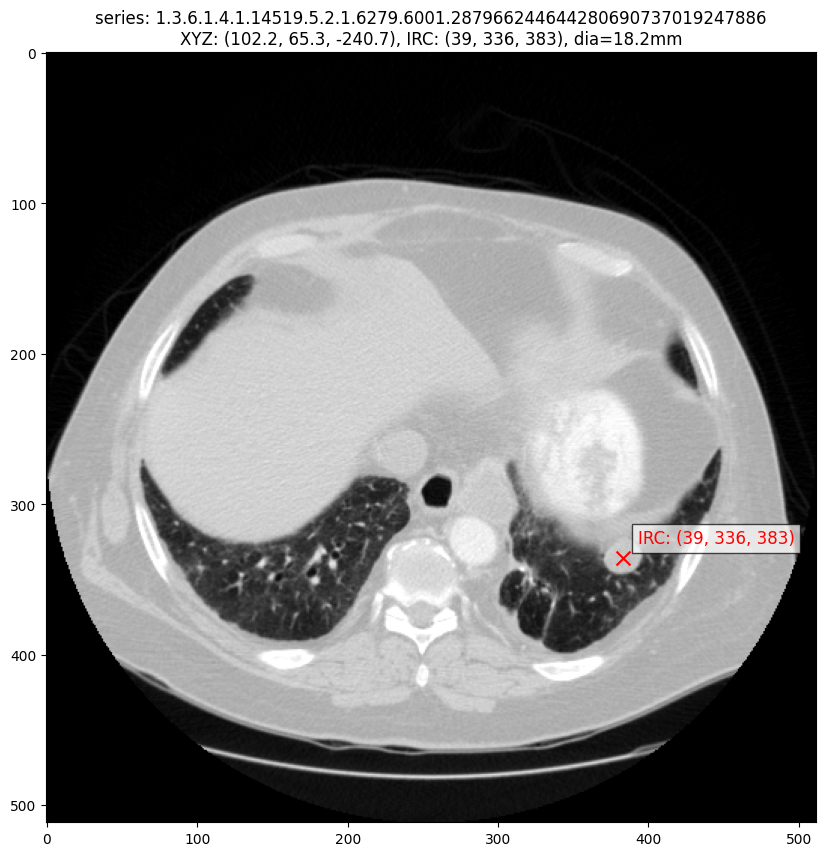

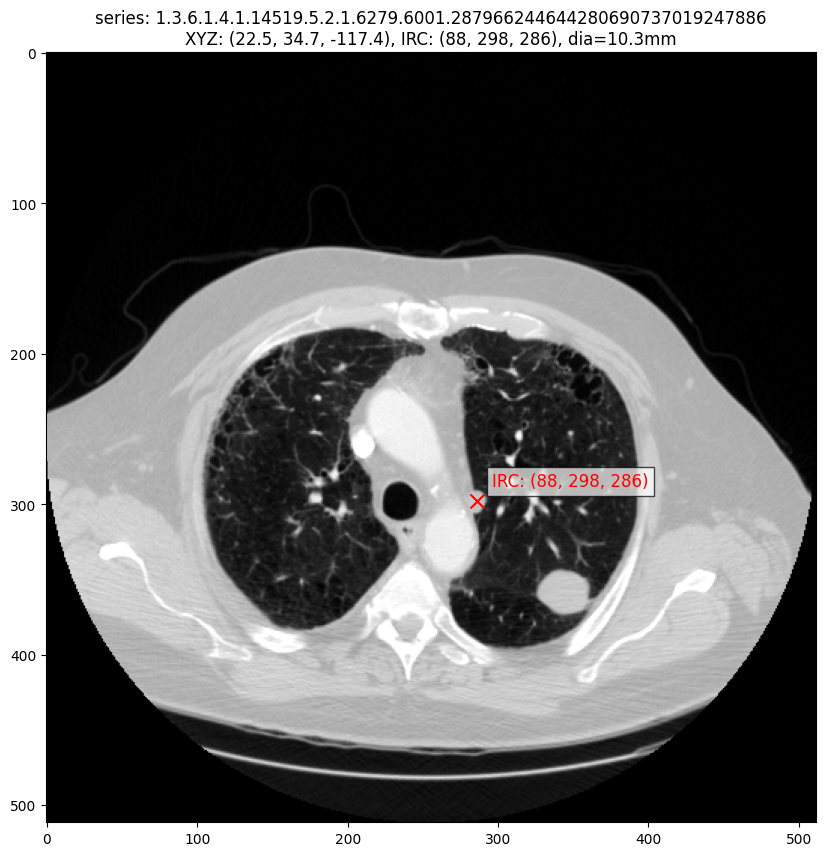

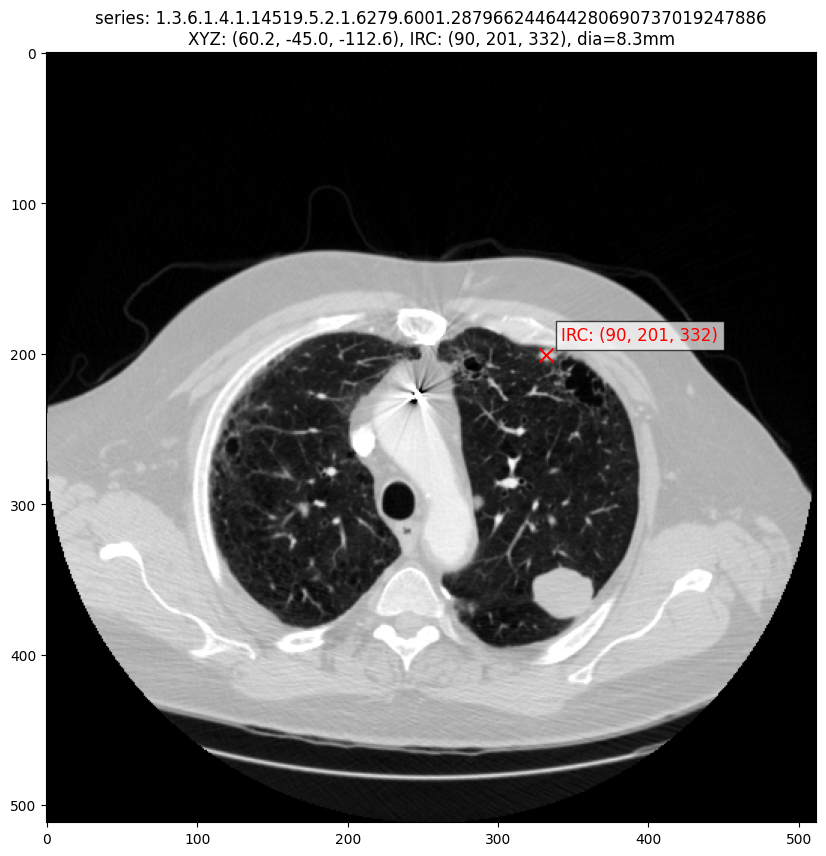

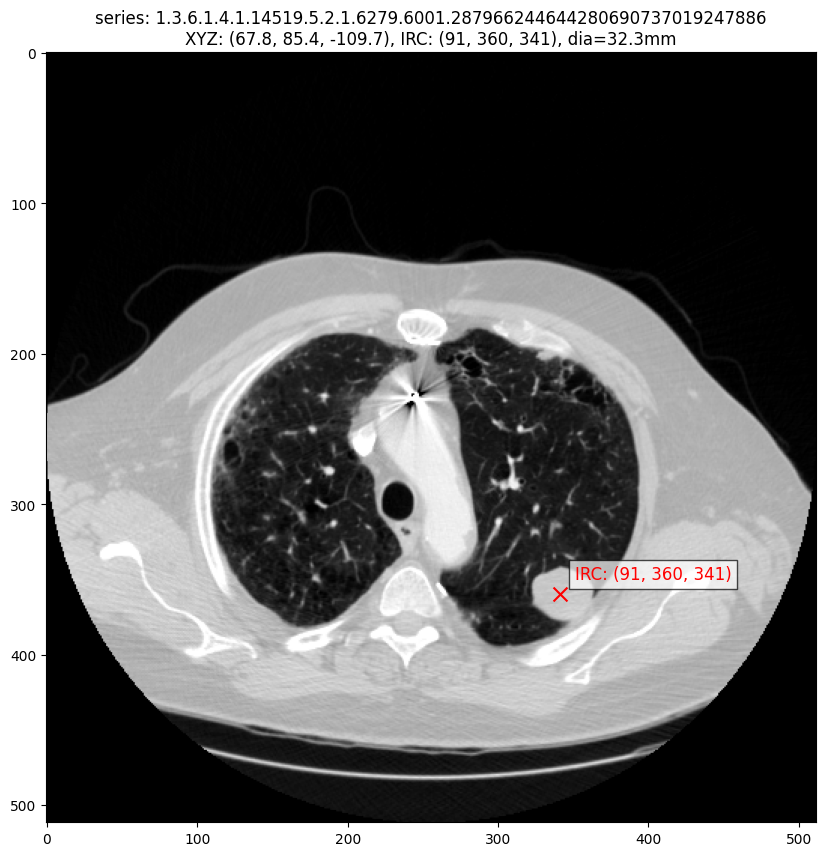

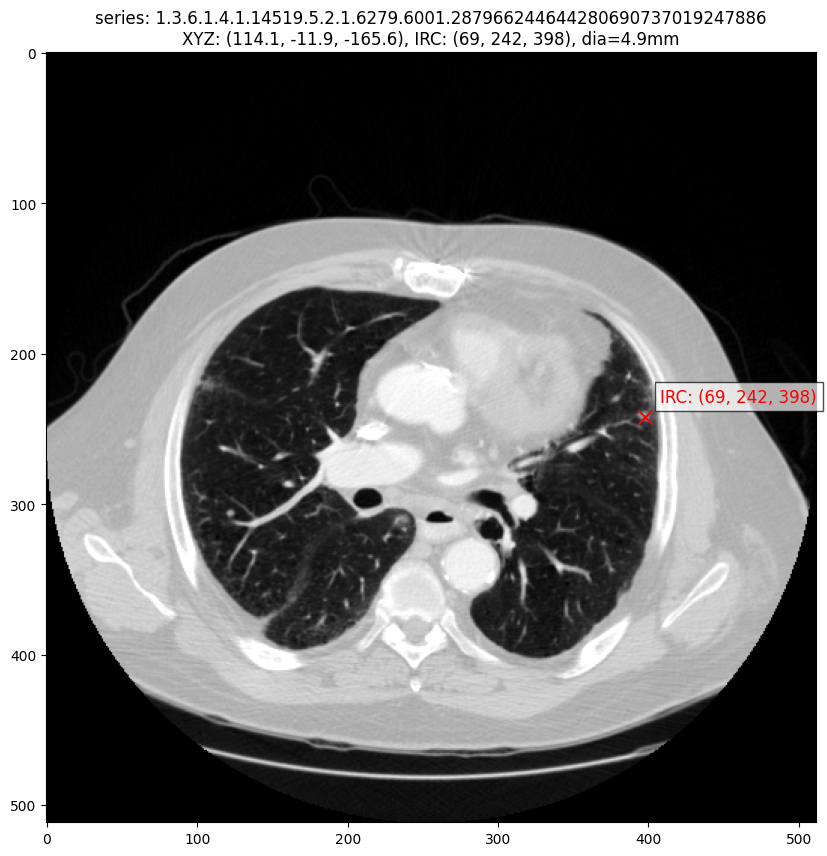

In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'

mhd_path = glob.glob(f'data-unversioned/part2/luna/subset*/{series_uid}.mhd')[0]
ct_mhd = sitk.ReadImage(mhd_path)
ct_array = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)
origin_xyz = ct_mhd.GetOrigin()
spacing_xyz = ct_mhd.GetSpacing()
direction = np.array(ct_mhd.GetDirection()).reshape(3, 3)

annotation_list = []
with open('data/part2/luna/annotations.csv') as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for row in reader:
        if row[0] == series_uid:
            x, y, z = map(float, row[1:4])
            diameter = float(row[4])
            annotation_list.append(((x, y, z), diameter))

for (center_xyz, diameter) in annotation_list:
    center_irc = xyz2irc(center_xyz, origin_xyz, spacing_xyz, direction)
    z, y, x = map(int, center_irc)

    xyz_clean = tuple(round(float(v), 1) for v in center_xyz)

    ct_clip = ct_array.copy()
    ct_clip.clip(-1000, 1000, out=ct_clip)

    plt.figure(figsize=(10, 10))
    plt.imshow(ct_clip[z], cmap='gray', vmin=-1000, vmax=300)
    plt.scatter([x], [y], c='r', s=100, marker='x')

    plt.text(x + 10, y - 10,
             f"IRC: ({z}, {y}, {x})",
             color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.title(f"series: {series_uid}\nXYZ: {xyz_clean}, IRC: ({z}, {y}, {x}), dia={diameter:.1f}mm")
    plt.show()